<a href="https://colab.research.google.com/github/margiecaina/Financial-Risk-Analysis/blob/main/Financial_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
data = pd.read_csv('/content/financial_portfolio_data.csv')
data.head(10)

,Date,Asset,Price
0,2023-07-10,Bond B,385.64
1,2023-03-03,Stock B,297.20
2,2023-09-13,Bond B,75.98
3,2023-01-07,Bond B,356.34
4,2023-06-04,Stock A,260.05
5,2023-04-02,Bond B,65.51
6,2023-01-14,Commodity A,486.32
7,2023-08-17,Commodity A,477.10
8,2023-03-27,Stock A,280.81
9,2023-05-13,Stock B,92.15


In [4]:
data.shape


(500, 3)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    500 non-null    object 
 1   Asset   500 non-null    object 
 2   Price   500 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.8+ KB


In [6]:
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%d")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    500 non-null    datetime64[ns]
 1   Asset   500 non-null    object        
 2   Price   500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.8+ KB


In [7]:
data.describe()


,Date,Price
count,500,500.000000
mean,2023-06-23 09:36:00,281.357720
min,2023-01-02 00:00:00,50.200000
25%,2023-03-28 00:00:00,169.945000
50%,2023-06-21 12:00:00,289.120000
75%,2023-09-13 00:00:00,393.132500
max,2023-12-31 00:00:00,499.790000
std,NaN,130.978208


In [8]:
pd.DataFrame(data["Asset"].value_counts())


,count
Asset,
Bond B,110
Bond A,109
Commodity A,106
Stock A,101
Stock B,74


In [9]:
duplicates = data[data.duplicated(subset=['Date', 'Asset'], keep=False)]
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 8 to 491
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    139 non-null    datetime64[ns]
 1   Asset   139 non-null    object        
 2   Price   139 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


In [10]:
aggregated_data = data.groupby(['Date', 'Asset']).agg({'Price': 'last'}).reset_index()
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    425 non-null    datetime64[ns]
 1   Asset   425 non-null    object        
 2   Price   425 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.1+ KB


In [11]:
data = aggregated_data


In [12]:
data.set_index("Date", inplace = True)
data.head()


,Asset,Price
Date,,
2023-01-02,Stock A,172.15
2023-01-03,Bond A,198.61
2023-01-03,Commodity A,453.23
2023-01-03,Stock A,488.57
2023-01-04,Bond A,142.24


In [13]:
data.sort_values(by = ["Asset", "Date"], inplace = True)
data.head()

,Asset,Price
Date,,
2023-01-03,Bond A,198.61
2023-01-04,Bond A,142.24
2023-01-08,Bond A,146.58
2023-01-11,Bond A,473.20
2023-01-13,Bond A,376.57


In [14]:
return_series = (data["Price"] - data["Price"].shift(1))/data["Price"].shift(1)
return_series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 425 entries, 2023-01-03 to 2023-12-22
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
424 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [15]:
data["return"] = data.groupby("Asset")["Price"].pct_change()
data.head()

,Asset,Price,return
Date,,,
2023-01-03,Bond A,198.61,NaN
2023-01-04,Bond A,142.24,-0.283823
2023-01-08,Bond A,146.58,0.030512
2023-01-11,Bond A,473.20,2.228271
2023-01-13,Bond A,376.57,-0.204205


In [16]:
data["return"].info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 425 entries, 2023-01-03 to 2023-12-22
Series name: return
Non-Null Count  Dtype  
--------------  -----  
420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


In [17]:
analyzed_return = data.groupby("Asset").agg({"return": ["mean", "std"]}).rename(columns = {"mean": "Average Return", "std": "risk"})
analyzed_return["Sharpe Ratio"] = analyzed_return["return"]["Average Return"]/analyzed_return["return"]["risk"]
analyzed_return


return           Sharpe Ratio
            Average Return      risk             
Asset                                            
Bond A            0.392623  1.333953     0.294331
Bond B            0.383650  1.222397     0.313851
Commodity A       0.445066  1.360368     0.327166
Stock A           0.367105  1.267488     0.289632
Stock B           0.609861  1.706511     0.357373

In [18]:
best_asset = analyzed_return["Sharpe Ratio"].idxmax()
worst_asset = analyzed_return["Sharpe Ratio"].idxmin()

In [19]:
print(f'The Asset with the best Sharpe Ratio is {best_asset} with a Sharpe Ratio of {analyzed_return["Sharpe Ratio"].max()}')
print(f'The Asset with the worst Sharpe Ratio is {worst_asset} with a Sharpe Ratio of {analyzed_return["Sharpe Ratio"].min()}')

The Asset with the best Sharpe Ratio is Stock B with a Sharpe Ratio of 0.3573727581271892
The Asset with the worst Sharpe Ratio is Stock A with a Sharpe Ratio of 0.2896318507065823


In [20]:
pivot_data = data.reset_index().pivot(index='Date', columns='Asset', values='return')
pivot_data.head()

Asset,Bond A,Bond B,Commodity A,Stock A,Stock B
Date,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,1.838048,NaN
2023-01-04,-0.283823,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,-0.638660,NaN,NaN
2023-01-07,NaN,NaN,1.567137,NaN,NaN


In [21]:
correlation_matrix = pivot_data.corr()
correlation_matrix


Asset,Bond A,Bond B,Commodity A,Stock A,Stock B
Asset,,,,,
Bond A,1.000000,-0.043729,-0.115973,-0.234267,-0.198601
Bond B,-0.043729,1.000000,-0.349057,0.180479,0.202751
Commodity A,-0.115973,-0.349057,1.000000,0.461493,0.210269
Stock A,-0.234267,0.180479,0.461493,1.000000,0.340772
Stock B,-0.198601,0.202751,0.210269,0.340772,1.000000


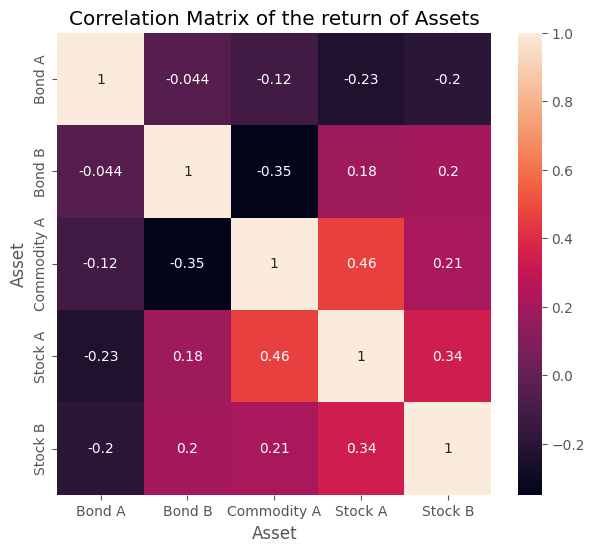

In [22]:
plt.figure(figsize = (7, 6))

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix of the return of Assets")
plt.show()
